In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import requests

melbourne_file_path = './data/melb_data.csv'
sales_file_path = './data/sales_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
sales_data = pd.read_csv(sales_file_path)
merged_data = pd.concat([melbourne_data, sales_data])

In [4]:
# print(melbourne_data.info())
print(merged_data.info())
print(merged_data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 126616 entries, 0 to 113035
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Suburb            13580 non-null   object 
 1   Address           13580 non-null   object 
 2   Rooms             13580 non-null   float64
 3   Type              13580 non-null   object 
 4   Price             13580 non-null   float64
 5   Method            13580 non-null   object 
 6   SellerG           13580 non-null   object 
 7   Date              126616 non-null  object 
 8   Distance          13580 non-null   float64
 9   Postcode          13580 non-null   float64
 10  Bedroom2          13580 non-null   float64
 11  Bathroom          13580 non-null   float64
 12  Car               13518 non-null   float64
 13  Landsize          13580 non-null   float64
 14  BuildingArea      7130 non-null    float64
 15  YearBuilt         8205 non-null    float64
 16  CouncilArea       12211 n

In [ ]:
print(melbourne_data.shape)

(13580, 21)


Text(0.5, 1.0, 'Correlation Matrix')

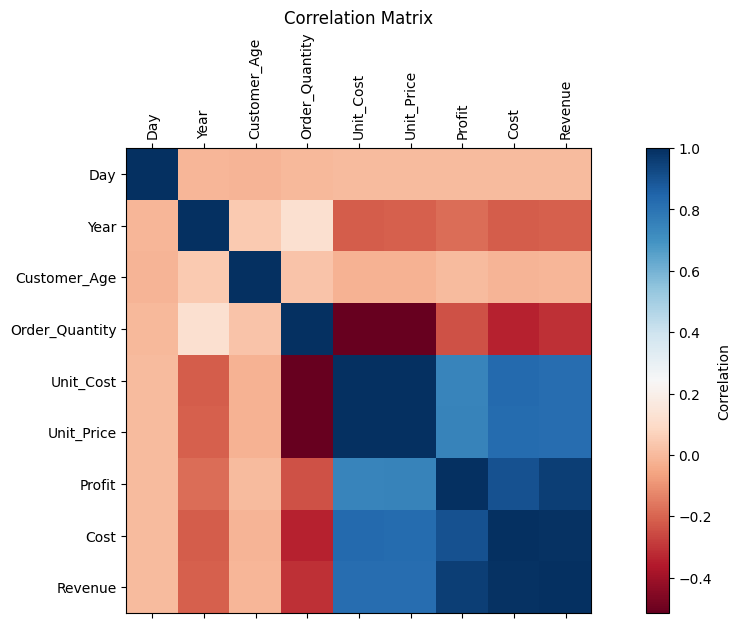

In [ ]:
numeric_cols = sales_data.select_dtypes(include=['number'])
correla = numeric_cols.corr()
figure = plt.figure(figsize=(14, 6))
plt.matshow(correla, fignum=figure.number, cmap='RdBu')
plt.xticks(range(len(correla.columns)), correla.columns, rotation=90)
plt.yticks(range(len(correla.columns)), correla.columns)
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')

<Axes: xlabel='Revenue', ylabel='Profit'>

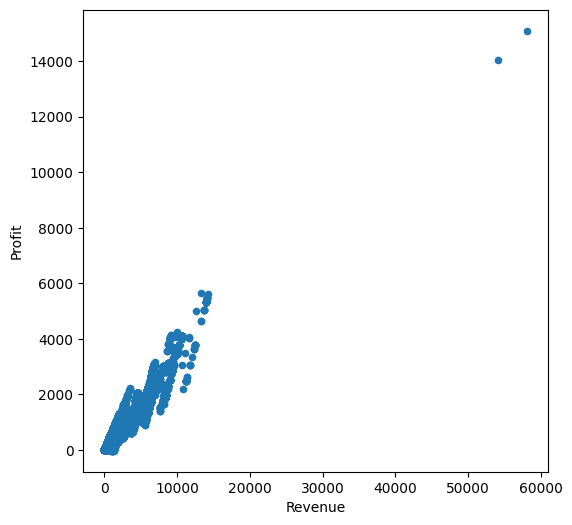

In [ ]:
sales_data.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [95]:
sales_data.Cost.idxmax()
print(sales_data.Cost.idxmax())

112073


In [77]:
def get_historic_price(symbol, exchange='bitfinex', after='2023-09-12'):
    url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '66bc92c0-172f-48a3-85a6-7a8d2118484c',
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data["data"])
    # df = pd.DataFrame(data['result']['3600'], columns=[
    #     'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    # ])
    # df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    # df.set_index('CloseTime', inplace=True)
    return df

In [78]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))

In [79]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
print(btc)

     id         name        symbol         slug  cmc_rank  num_market_pairs  \
0  7318  fn1bgwtu674   rjn0ixbqicb  zr0mqgei58n      1095              8487   
1  1099  rzdd9lm8n1o   d5umchb3n88  9ydrfi8rgye      1604              9908   
2  4908  y9snn4dty8f   wlcmehr4a5f   abqunwvqnw      8198              4698   
3  9504  1fir49o2wdg  0ivjkh66n1ai  4b9lrxv4l5u       437              4163   
4  7804  27jyuimxxbi   tjix7faa22s  a7jdra89wjo      1043              2281   
5  9871  ra0ajahumst    olsm3uigpe   pmpxc3h5vr       354              2151   
6  2696  ko2pj9vxsoi   wkq48tfxuua  2g5f4p38ywo      4112              1775   
7  1663   rdp3yhk6mo   6suvhfsr7jd  qye9pscz34d       427              9122   
8  6047  7c5dpcp4ybj   gy6nhpj77mt  13a32q9q9f1      9824              9020   
9  2853   x7npg3oiaq   i0dw6yffvie  2qb0lgn2vnt      1711               989   

   circulating_supply  total_supply  max_supply infinite_supply  \
0                2033          6172        6485            None

In [88]:
print(btc)

     id         name        symbol         slug  cmc_rank  num_market_pairs  \
0  7318  fn1bgwtu674   rjn0ixbqicb  zr0mqgei58n      1095              8487   
1  1099  rzdd9lm8n1o   d5umchb3n88  9ydrfi8rgye      1604              9908   
2  4908  y9snn4dty8f   wlcmehr4a5f   abqunwvqnw      8198              4698   
3  9504  1fir49o2wdg  0ivjkh66n1ai  4b9lrxv4l5u       437              4163   
4  7804  27jyuimxxbi   tjix7faa22s  a7jdra89wjo      1043              2281   
5  9871  ra0ajahumst    olsm3uigpe   pmpxc3h5vr       354              2151   
6  2696  ko2pj9vxsoi   wkq48tfxuua  2g5f4p38ywo      4112              1775   
7  1663   rdp3yhk6mo   6suvhfsr7jd  qye9pscz34d       427              9122   
8  6047  7c5dpcp4ybj   gy6nhpj77mt  13a32q9q9f1      9824              9020   
9  2853   x7npg3oiaq   i0dw6yffvie  2qb0lgn2vnt      1711               989   

   circulating_supply  total_supply  max_supply infinite_supply  \
0                2033          6172        6485            None